In [2]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# change some settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)
plt.rcParams['figure.figsize'] = (10,8)

# indicate paths to files

import os, sys 
data_path = r"C:\Users\xy200\OneDrive\Desktop\24sping\program\bikeshare.csv"

In [3]:
# TEST 

assert 'pandas' in sys.modules and "pd" in locals()
assert 'numpy' in sys.modules and "np" in locals()
assert 'matplotlib' in sys.modules and "plt" in locals()
assert 'seaborn' in sys.modules and "sns" in locals()

Step1: Loading the Data-load the contents of the file into a table

In [4]:
bike = pd.read_csv(data_path)
bike

,instant,dteday,season,yr,...,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,...,0.0000,3,13,16
1,2,2011-01-01,1,0,...,0.0000,8,32,40
2,3,2011-01-01,1,0,...,0.0000,5,27,32
3,4,2011-01-01,1,0,...,0.0000,3,10,13
4,5,2011-01-01,1,0,...,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,...,0.1642,11,108,119
17375,17376,2012-12-31,1,1,...,0.1642,8,81,89
17376,17377,2012-12-31,1,1,...,0.1642,7,83,90
17377,17378,2012-12-31,1,1,...,0.1343,13,48,61


In [5]:
bike.shape

(17379, 17)

Step2: Data Processing-4 of the columns in the table use numbers as categorical data. Convert them to strings indicating the different categories

In [6]:
# convert the numbers in holidays, weekdays, weekends and weatherlist to strings
# use replace method to replace numbers with strings
reformatted_holiday = bike["holiday"].replace({0 : "no", 1 : "yes"})
bike["holiday"] = reformatted_holiday

In [7]:
# Replace numbers with strings in 'weekday'
reformatted_weekday = bike['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Replace numbers with strings in 'workingday'
reformatted_workingday = bike['workingday'].replace({0: 'no', 1: 'yes'})

# Replace numbers with strings in 'weathersit'
reformatted_weathersit = bike['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'})


bike["weekday"] = reformatted_weekday
bike["workingday"] = reformatted_workingday
bike["weathersit"] = reformatted_weathersit

In [8]:
# TEST 

assert list(bike['holiday'].iloc[370:375]) == ['no', 'no', 'yes', 'yes', 'yes']
assert list(bike['weekday'].iloc[::2000]) == ['Sat', 'Tue', 'Mon', 'Mon', 'Mon', 'Sun', 'Sun', 'Sat', 'Sun']

In [9]:
# Count the number of different weather conditions
# Use the value_counts method to count the number frequency of Clear, Misty, Light, Heavy
bike["weathersit"].value_counts()

Clear    11413
Mist      4544
Light     1419
Heavy        3
Name: weathersit, dtype: int64

In [10]:
num_holidays = bike['holiday'].value_counts().get('yes', 0)

In [11]:
# The dataset contains hourly records. I will change to daily records.
# Construct a table with 3 columns
# casual: total number of casual riders for each day
# registered: total number of registered riders for each day
# workingday: whether that day is a working day or not (yes or no)

In [12]:
# Use groupby operation to group records by dtedate
daily_counts = bike.groupby(bike['dteday'])[["workingday"]].first()
daily_counts

,workingday
dteday,
2011-01-01,no
2011-01-02,no
2011-01-03,yes
2011-01-04,yes
2011-01-05,yes
...,...
2012-12-27,yes
2012-12-28,yes
2012-12-29,no


In [13]:
daily_counts["casual"] = bike.groupby(bike['dteday'])[["casual"]].sum()
daily_counts

,workingday,casual
dteday,,
2011-01-01,no,331
2011-01-02,no,131
2011-01-03,yes,120
2011-01-04,yes,108
2011-01-05,yes,82
...,...,...
2012-12-27,yes,247
2012-12-28,yes,644
2012-12-29,no,159


In [14]:
daily_counts["registered"] = bike.groupby('dteday')['registered'].sum()
daily_counts

,workingday,casual,registered
dteday,,,
2011-01-01,no,331,654
2011-01-02,no,131,670
2011-01-03,yes,120,1229
2011-01-04,yes,108,1454
2011-01-05,yes,82,1518
...,...,...,...
2012-12-27,yes,247,1867
2012-12-28,yes,644,2451
2012-12-29,no,159,1182


Step3: Daily Frequency-Compare the distribution of the daily counts of casual and registered riders

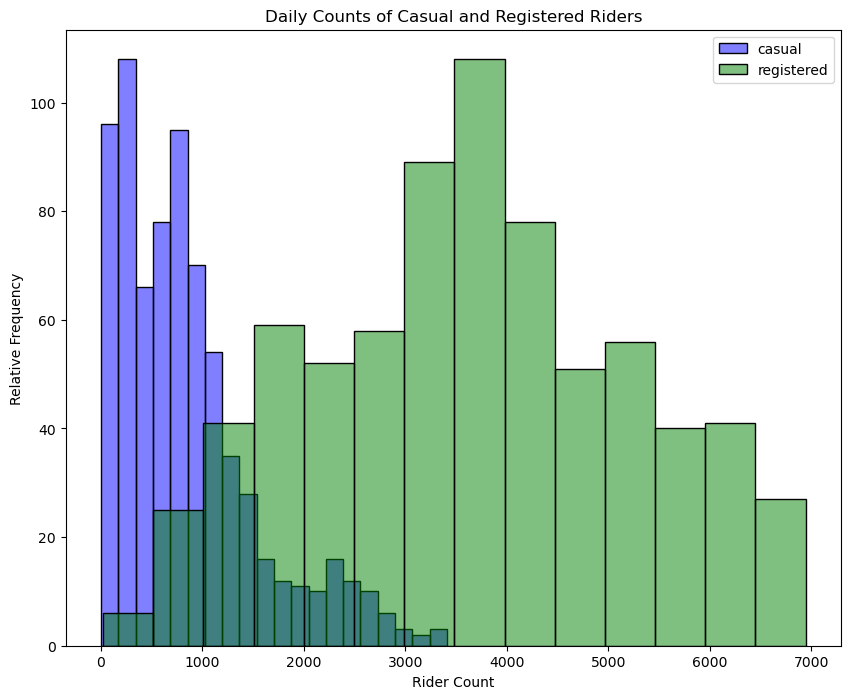

In [15]:
# display the relative frequency of daily counts
casual_data = daily_counts['casual']
registered_data = daily_counts['registered']

sns.histplot(casual_data, label='casual', color = "blue", alpha = 0.5)
sns.histplot(registered_data, label='registered', color='green', alpha = 0.5)

plt.legend()
plt.title("Daily Counts of Casual and Registered Riders")
plt.xlabel("Rider Count")
plt.ylabel("Relative Frequency");

1. Registered

Counts for registered riders range from 0 to 7000 with a mode of about 4000.

The distribution of relative frequencies is symmetric.

2. Casual

Counts for casual riders range from 0 to 4000 with a mode of about 200. The histogram might indicate another mode of about 750

The distribution of relative frequencies is not symmetric. The distribution is right-skewed with a long tail extending to about 2500

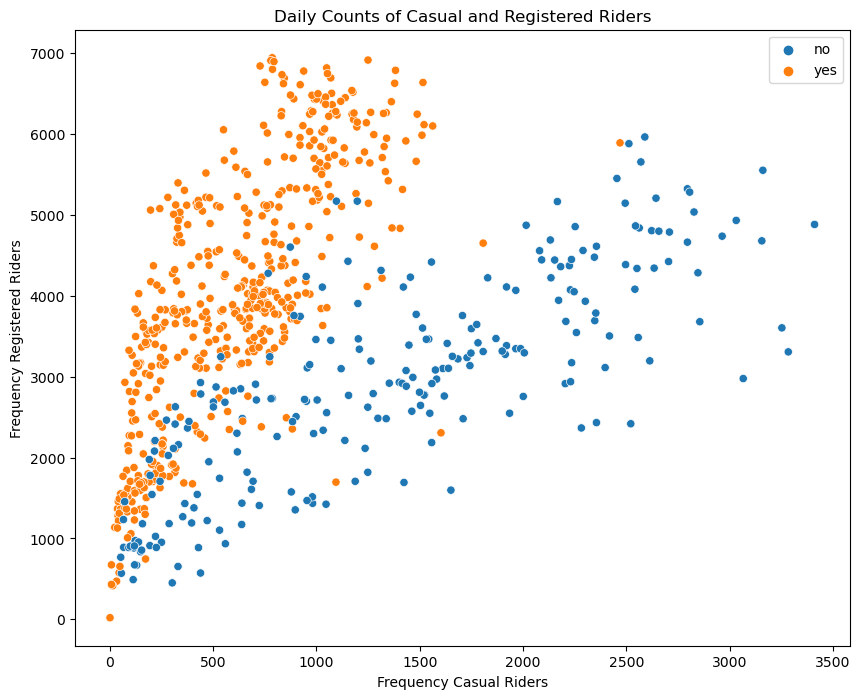

In [16]:
#  display the relationship between counts of registered riders and counts of casual rides
horizontal_axis_data = daily_counts['casual']
vertical_axis_data = daily_counts['registered']
color_data = daily_counts['workingday']

sns.scatterplot(x=horizontal_axis_data, y=vertical_axis_data, hue=list(color_data), data=daily_counts)

plt.legend()
plt.title("Daily Counts of Casual and Registered Riders")
plt.xlabel("Frequency Casual Riders")
plt.ylabel("Frequency Registered Riders");

Trend

I observe a linear relationship between counts of registered riders and counts of casual riders. The correlation for both weekday and weekend is positive.

Over-plotting

I find many overlapping points. I could better understand the trend by separating the points of different color.

Step4: Hourly Frequency-explore the hourly frequency of riders

In [17]:
# I will focus on the month of June 2011. 
# I wanna make a line-chart showing: average number of causal riders per hour and average number of registered riders per hour
bike_june_2011 = bike[(bike["yr"] == 0) & (bike["mnth"] == 6)].copy()

In [18]:
# group by the hr column to calculate the average frequency of casual riders with the mean operation
bike_june_2011_grouped = bike_june_2011.groupby(bike_june_2011["hr"])[["casual"]].mean()
bike_june_2011_grouped

,casual
hr,
0,12.866667
1,8.433333
2,5.000000
3,3.800000
4,2.000000
...,...
19,69.000000
20,59.833333
21,44.433333


In [20]:
bike_june_2011_grouped['registered'] = bike_june_2011.groupby('hr')['registered'].mean()
bike_june_2011_grouped

,casual,registered
hr,,
0,12.866667,45.600000
1,8.433333,29.133333
2,5.000000,18.366667
3,3.800000,7.366667
4,2.000000,5.666667
...,...,...
19,69.000000,289.433333
20,59.833333,222.900000
21,44.433333,167.966667


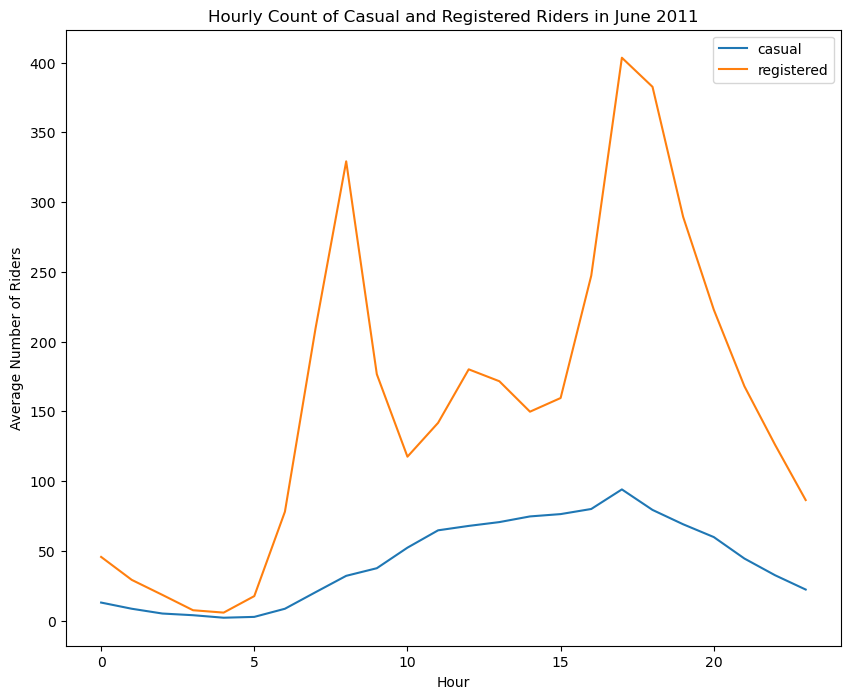

In [21]:
horizontal_data = bike_june_2011_grouped.index
vertical_data_casual = bike_june_2011_grouped['casual']
vertical_data_registered = bike_june_2011_grouped['registered']

sns.lineplot(x = horizontal_data, y = vertical_data_casual, label='casual')
sns.lineplot(x = horizontal_data, y = vertical_data_registered, label='registered')

plt.title("Hourly Count of Casual and Registered Riders in June 2011")
plt.ylabel("Average Number of Riders")
plt.xlabel("Hour")
plt.legend();

Frequency

The number of registered riders on average exceeds the number of casual riders throughout the day

Hours

The frequency of casual riders has a mode at about 5PM.
The frequency of registered riders has modes at about 7AM and 5PM. Note that these times coincide with rush-hour for commuting.

C:\Users\xy200\AppData\Local\Temp\ipykernel_108200\77126095.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_grouped = bike.groupby('hr').mean()


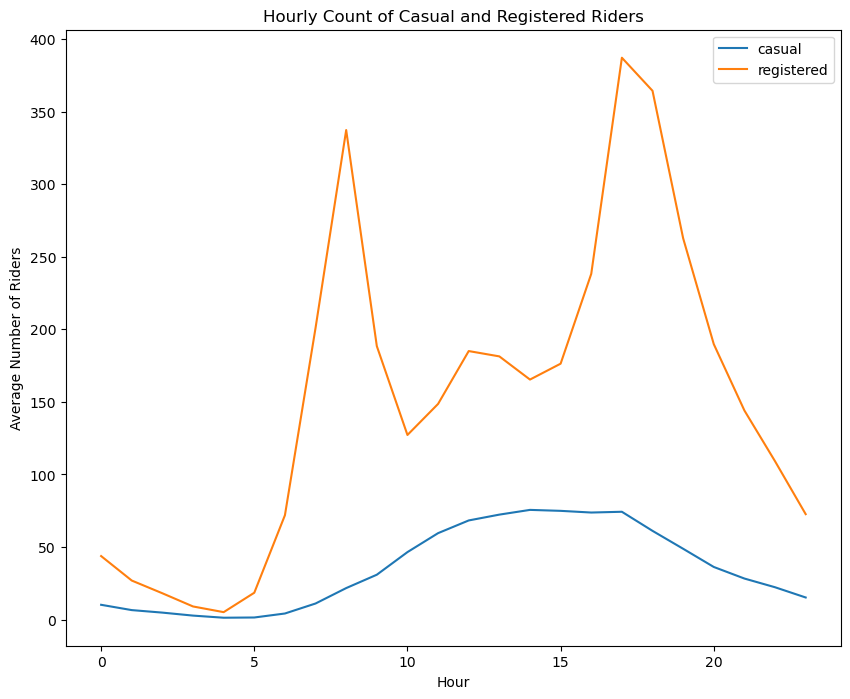

In [22]:
# Generate line-chart not restricted to the month of June 2011
bike_grouped = bike.groupby('hr').mean()


horizontal_data = bike_grouped.index
vertical_data_casual = bike_grouped['casual']
vertical_data_registered = bike_grouped['registered']

sns.lineplot(x = horizontal_data, y = vertical_data_casual, label='casual')
sns.lineplot(x = horizontal_data, y = vertical_data_registered, label='registered')

plt.title("Hourly Count of Casual and Registered Riders")
plt.ylabel("Average Number of Riders")
plt.xlabel("Hour")
plt.legend();

 The line-chart is less jagged than the line-chart of single month.

Step5: Frequency and Weather-info about the weather including precipitation, wind speed, temperature, humidity, I want to understand the impact of weather on riders

In [28]:
# Before explore the effect of weather, add columns prop_casual and temp_farenheit to the bike table
# Prop_casual: the relative frequency of casual riders to registered riders
# temp_farenheit: the temperature in Farenheit
# calculate the number of riders
total = bike['casual'] + bike['registered']

# add to DataFrame
bike['total'] = total

# add prop_casual column, meaning the number of casual riders/total riders
bike['prop_casual'] = bike['casual'] / bike['total']

# test
total.shape

(17379,)

In [29]:
# add prop_casual column
bike['prop_casual'] = bike['casual'] / total

# test
int(bike["prop_casual"].sum())

2991

In [30]:
# convert between F and C
celsius = 41 * bike["temp"]
farenheit = (celsius * 9/5) + 32

bike["temp_farenheit"] = farenheit

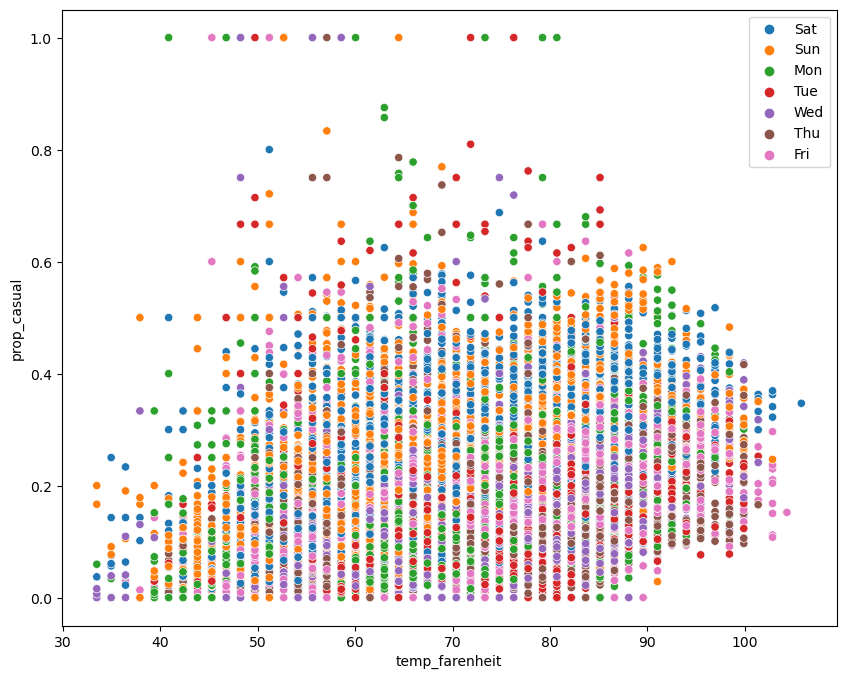

In [31]:
# generate a chart showing the impact of temperature on the relative frequency of casual riders compared to registered riders. 
# stratify the records by weekday
horizontal_data = bike["temp_farenheit"]
vertical_data = bike["prop_casual"]
color_data = bike["weekday"]

sns.scatterplot(x=horizontal_data, y=vertical_data, hue=list(color_data));

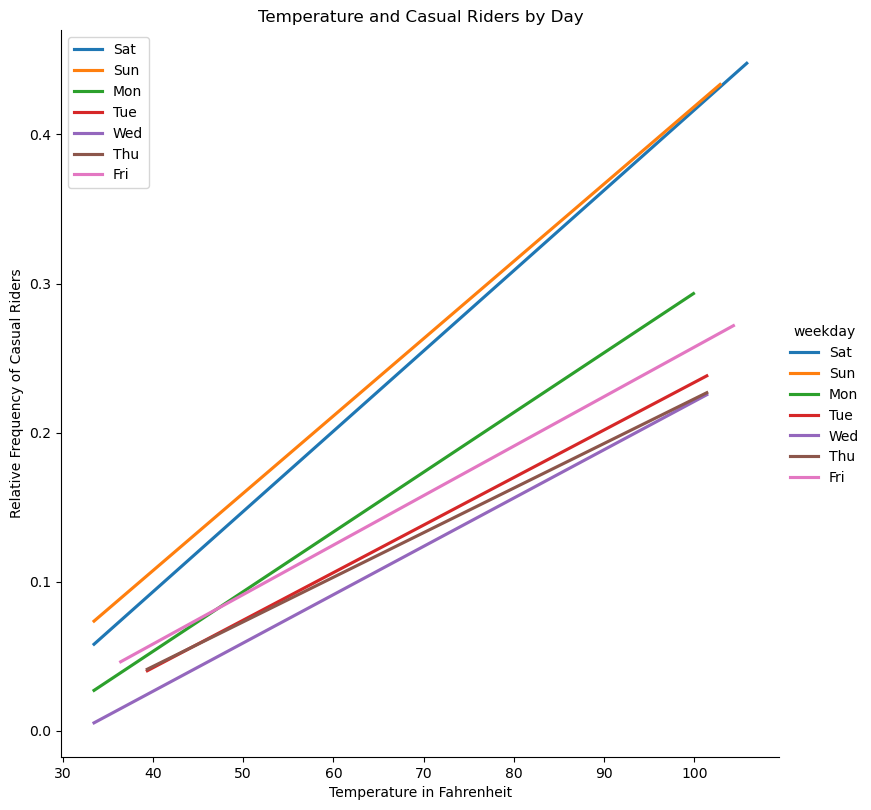

In [32]:
sns.lmplot(data = bike, x="temp_farenheit", y="prop_casual", hue="weekday", ci=0, scatter=False, height = 8)

plt.title("Temperature and Casual Riders by Day")
plt.xlabel("Temperature in Fahrenheit")
plt.ylabel("Relative Frequency of Casual Riders")
plt.legend();

Observations:
1. the temperature increases then the relative frequency of casual riders increases.

2. Weekends and weekdays don't have about the same relative frequency of casual riders